In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Train.csv")

In [3]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
catagorical_values=data.select_dtypes(include=[object])
print("the size of the database is",catagorical_values.shape[1])
num=data.select_dtypes(include=[np.float64,np.int64])
print("numerical values",num.shape[1])

the size of the database is 7
numerical values 5


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Item_Weight'>

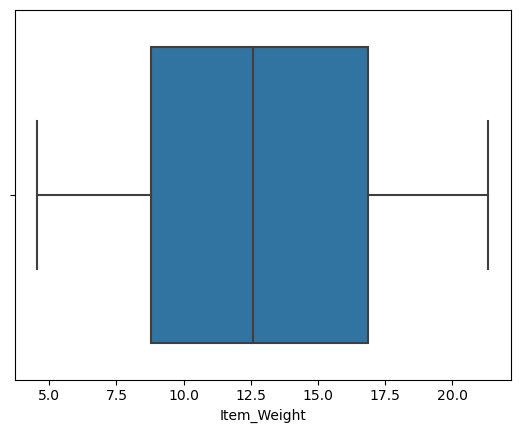

In [8]:
sns.boxplot(x=data["Item_Weight"])

<AxesSubplot:xlabel='Item_MRP'>

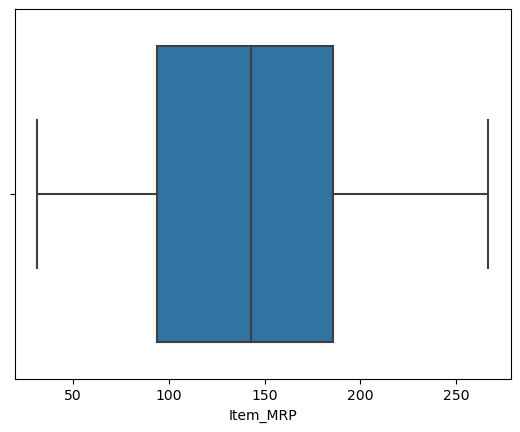

In [9]:
sns.boxplot(x=data["Item_MRP"])

In [10]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

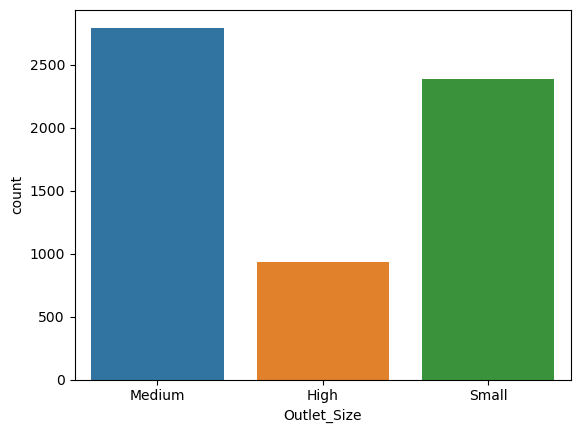

In [11]:
sns.countplot(x='Outlet_Size',data=data)

In [12]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [14]:
data.replace({'Item_Fat_Content':{'Regular':0,'low fat':1,'Low Fat':1,'LF':1,'reg':0}},inplace=True)

In [15]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,0,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,0,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,0,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [16]:
data=data.drop('Outlet_Identifier',axis=1)

In [17]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,1,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,0,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,1,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,0,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,0,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,0,0.094450,Frozen Foods,187.8214,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [18]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
data=data.replace({"Outlet_Size":{"Medium":1,"Small":0,"High":2}})

In [20]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,1,0.016760,Meat,141.6180,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,0,0.000000,Fruits and Vegetables,182.0950,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,1,0.000000,Household,53.8614,1987,2,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,0,0.000000,Baking Goods,51.4008,2009,1,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,1987,2,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,1985,1,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,0,0.016687,Frozen Foods,96.9726,2002,1,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,0,0.094450,Frozen Foods,187.8214,2007,1,Tier 2,Supermarket Type1,4710.5350


In [21]:
data=data.join(pd.get_dummies(data["Item_Type"]))

In [22]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,1999,1,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,2009,1,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500000,1,0.016760,Meat,141.6180,1999,1,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200000,0,0.000000,Fruits and Vegetables,182.0950,1998,1,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930000,1,0.000000,Household,53.8614,1987,2,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
5,FDP36,10.395000,0,0.000000,Baking Goods,51.4008,2009,1,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,0
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,1987,2,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,1985,1,Tier 3,Supermarket Type3,...,0,0,0,0,0,0,0,1,0,0
8,FDH17,16.200000,0,0.016687,Frozen Foods,96.9726,2002,1,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
9,FDU28,19.200000,0,0.094450,Frozen Foods,187.8214,2007,1,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data=data.drop("Item_Identifier",axis=1)

In [24]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300000,1,0.016047,Dairy,249.8092,1999,1,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0,0.019278,Soft Drinks,48.2692,2009,1,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,1,0.016760,Meat,141.6180,1999,1,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0,0.000000,Fruits and Vegetables,182.0950,1998,1,Tier 3,Grocery Store,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,1,0.000000,Household,53.8614,1987,2,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0,0.000000,Baking Goods,51.4008,2009,1,Tier 3,Supermarket Type2,556.6088,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0,0.012741,Snack Foods,57.6588,1987,2,Tier 3,Supermarket Type1,343.5528,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,1,0.127470,Snack Foods,107.7622,1985,1,Tier 3,Supermarket Type3,4022.7636,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0,0.016687,Frozen Foods,96.9726,2002,1,Tier 2,Supermarket Type1,1076.5986,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0,0.094450,Frozen Foods,187.8214,2007,1,Tier 2,Supermarket Type1,4710.5350,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data=data.drop("Item_Type",axis=1)

In [26]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300000,1,0.016047,249.8092,1999,1,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0,0.019278,48.2692,2009,1,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,1,0.016760,141.6180,1999,1,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0,0.000000,182.0950,1998,1,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,1,0.000000,53.8614,1987,2,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0,0.000000,51.4008,2009,1,Tier 3,Supermarket Type2,556.6088,1,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0,0.012741,57.6588,1987,2,Tier 3,Supermarket Type1,343.5528,0,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,1,0.127470,107.7622,1985,1,Tier 3,Supermarket Type3,4022.7636,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0,0.016687,96.9726,2002,1,Tier 2,Supermarket Type1,1076.5986,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0,0.094450,187.8214,2007,1,Tier 2,Supermarket Type1,4710.5350,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data=data.drop("Outlet_Type",axis=1)

In [28]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300000,1,0.016047,249.8092,1999,1,Tier 1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0,0.019278,48.2692,2009,1,Tier 3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,1,0.016760,141.6180,1999,1,Tier 1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0,0.000000,182.0950,1998,1,Tier 3,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,1,0.000000,53.8614,1987,2,Tier 3,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0,0.000000,51.4008,2009,1,Tier 3,556.6088,1,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0,0.012741,57.6588,1987,2,Tier 3,343.5528,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,1,0.127470,107.7622,1985,1,Tier 3,4022.7636,0,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0,0.016687,96.9726,2002,1,Tier 2,1076.5986,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0,0.094450,187.8214,2007,1,Tier 2,4710.5350,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data=data.replace({"Outlet_Location_Type":{"Tier 1":1,"Tier 2":2,"Tier 3":3}})

In [30]:
data['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300000,1,0.016047,249.8092,1999,1,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0,0.019278,48.2692,2009,1,3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,1,0.016760,141.6180,1999,1,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0,0.000000,182.0950,1998,1,3,732.3800,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,1,0.000000,53.8614,1987,2,3,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0,0.000000,51.4008,2009,1,3,556.6088,1,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0,0.012741,57.6588,1987,2,3,343.5528,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,1,0.127470,107.7622,1985,1,3,4022.7636,0,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0,0.016687,96.9726,2002,1,2,1076.5986,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0,0.094450,187.8214,2007,1,2,4710.5350,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data=data.drop("Outlet_Establishment_Year",axis=1)

In [33]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300000,1,0.016047,249.8092,1,1,3735.1380,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920000,0,0.019278,48.2692,1,3,443.4228,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500000,1,0.016760,141.6180,1,1,2097.2700,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200000,0,0.000000,182.0950,1,3,732.3800,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930000,1,0.000000,53.8614,2,3,994.7052,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395000,0,0.000000,51.4008,1,3,556.6088,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0,0.012741,57.6588,2,3,343.5528,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,12.857645,1,0.127470,107.7622,1,3,4022.7636,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200000,0,0.016687,96.9726,1,2,1076.5986,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0,0.094450,187.8214,1,2,4710.5350,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf=RandomForestRegressor()

In [36]:
x=data.drop("Item_MRP",axis=1)

In [38]:
y=data["Item_MRP"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
data_predict=rf.predict(x_test)

In [45]:
from sklearn.metrics import r2_score

In [46]:
print("the accuracy is",r2_score(data_predict,y_test))

the accuracy is -0.024300403434239115


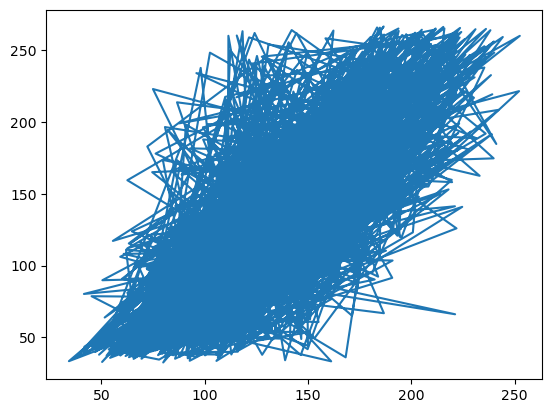

In [47]:
plt.plot(data_predict,_test)
plt.show()